In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [8]:
data = pd.read_csv('Wii.dat',sep="\t")

In [10]:
data.head(10)

,athlete,stretch,wii,injury
0,Athlete,Stretching,Playing Wii,2
1,Athlete,Stretching,Playing Wii,2
2,Athlete,Stretching,Playing Wii,1
3,Athlete,Stretching,Playing Wii,2
4,Athlete,Stretching,Playing Wii,0
5,Athlete,Stretching,Playing Wii,1
6,Athlete,Stretching,Playing Wii,2
7,Athlete,Stretching,Playing Wii,0
8,Athlete,Stretching,Playing Wii,2
9,Athlete,Stretching,Playing Wii,2


In [11]:
data['athlete'].unique()

array(['Athlete', 'Non-Athlete'], dtype=object)

In [12]:
data['stretch'].unique()

array(['Stretching', 'No Stretching'], dtype=object)

In [13]:
data['wii'].unique()

array(['Playing Wii', 'Watching Wii'], dtype=object)

In [14]:
data.groupby(['athlete','stretch','wii'])['injury'].describe()

count      mean       std  min  25%  \
athlete     stretch       wii                                                 
Athlete     No Stretching Playing Wii    15.0  2.466667  1.060099  1.0  2.0   
                          Watching Wii   15.0  2.000000  1.000000  0.0  1.5   
            Stretching    Playing Wii    15.0  1.666667  0.975900  0.0  1.0   
                          Watching Wii   15.0  1.800000  1.146423  0.0  1.0   
Non-Athlete No Stretching Playing Wii    15.0  6.600000  1.956674  4.0  5.0   
                          Watching Wii   15.0  2.000000  1.195229  0.0  1.0   
            Stretching    Playing Wii    15.0  4.200000  1.146423  2.0  3.5   
                          Watching Wii   15.0  2.400000  1.121224  1.0  1.5   

                                        50%  75%   max  
athlete     stretch       wii                           
Athlete     No Stretching Playing Wii   2.0  3.0   4.0  
                          Watching Wii  2.0  2.5   4.0  
            Stretching    Playing Wii   2.0  2.0   4.0  
                          Watching Wii  2.0  3.0   3.0  
Non-Athlete No Stretching Playing Wii   7.0  8.0  10.0  
                          Watching Wii  2.0  3.0   4.0  
            Stretching    Playing Wii   4.0  5.0   6.0  
                          Watching Wii  2.0  3.0   4.0

In [17]:
unique_list = [1,2,3,4,5,6,7,8]
unique_list

[1, 2, 3, 4, 5, 6, 7, 8]

In [20]:
data['interaction']=0

In [21]:
for i in range(8):
    for j in range(15):
        data.at[15*i+j,'interaction'] = unique_list[i]  

In [24]:
pg.homoscedasticity(data, dv='injury',group='interaction')

,W,pval,equal_var
levene,2.137803,0.045231,False


In [26]:
contrast_ath = np.array([[1,-1]])
contrast_ath =contrast_ath.reshape(2,1)
contrast_ath

array([[ 1],
       [-1]])

In [27]:
contrast_str = np.array([[1,-1]])
contrast_str =contrast_str.reshape(2,1)
contrast_str

array([[ 1],
       [-1]])

In [28]:
contrast_wii = np.array([[1,-1]])
contrast_wii =contrast_wii.reshape(2,1)
contrast_wii

array([[ 1],
       [-1]])

In [33]:
m01 = smf.ols('injury~C(athlete,contrast_ath)*C(stretch,contrast_str)*C(wii,contrast_wii)',data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 injury   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     28.30
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           4.38e-22
Time:                        13:16:57   Log-Likelihood:                -191.55
No. Observations:                 120   AIC:                             399.1
Df Residuals:                     112   BIC:                             421.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================================
                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                             2.8917      0.113     25.631      0.000       2.668       3.115
C(athlete, contrast_ath)[custom0]                                                                    -0.9083      0.113     -8.051      0.000      -1.132      -0.685
C(stretch, contrast_str)[custom0]                                                                     0.3750      0.113      3.324      0.001       0.151       0.599
C(wii, contrast_wii)[custom0]                                                                         0.8417      0.113      7.460      0.000       0.618       1.065
C(athlete, contrast_ath)[custom0]:C(stretch, contrast_str)[custom0]                                  -0.1250      0.113     -1.108      0.270      -0.349       0.099
C(athlete, contrast_ath)[custom0]:C(wii, contrast_wii)[custom0]                                      -0.7583      0.113     -6.722      0.000      -0.982      -0.535
C(stretch, contrast_str)[custom0]:C(wii, contrast_wii)[custom0]                                       0.4250      0.113      3.767      0.000       0.201       0.649
C(athlete, contrast_ath)[custom0]:C(stretch, contrast_str)[custom0]:C(wii, contrast_wii)[custom0]    -0.2750      0.113     -2.438      0.016      -0.499      -0.051
==============================================================================
Omnibus:                        0.261   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.435
Skew:                          -0.002   Prob(JB):                        0.804
Kurtosis:                       2.705   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
sm.stats.anova_lm(m01,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,1003.408333,1.0,656.946999,1.137387e-48
"C(athlete, contrast_ath)",99.008333,1.0,64.822292,9.595121e-13
"C(stretch, contrast_str)",16.875000,1.0,11.048324,1.200092e-03
"C(wii, contrast_wii)",85.008333,1.0,55.656274,1.982232e-11
"C(athlete, contrast_ath):C(stretch, contrast_str)",1.875000,1.0,1.227592,2.702496e-01
"C(athlete, contrast_ath):C(wii, contrast_wii)",69.008333,1.0,45.180826,7.869216e-10
"C(stretch, contrast_str):C(wii, contrast_wii)",21.675000,1.0,14.190959,2.650680e-04
"C(athlete, contrast_ath):C(stretch, contrast_str):C(wii, contrast_wii)",9.075000,1.0,5.941543,1.636123e-02
Residual,171.066667,112.0,NaN,NaN


# **Making barplots and interaction plot**

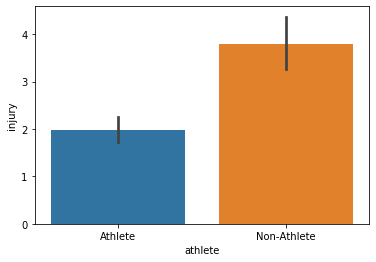

In [56]:
_ = sns.barplot(x='athlete',y='injury',data=data)

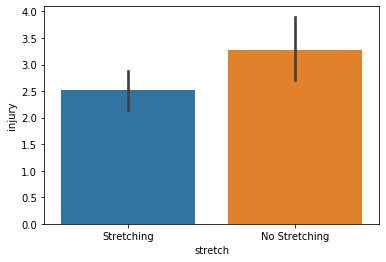

In [36]:
_ = sns.barplot(x='stretch',y='injury',data=data)

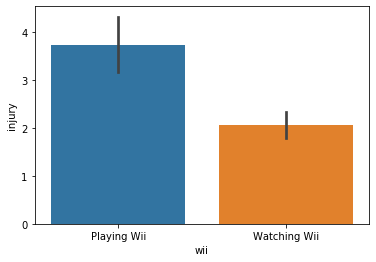

In [37]:
_ = sns.barplot(x='wii',y='injury',data=data)

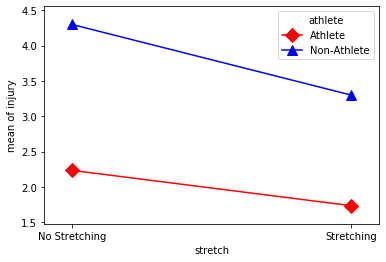

In [57]:
from statsmodels.graphics.factorplots import interaction_plot
# athlete-stretch , non-significant
fig = interaction_plot(data.stretch, data.athlete, data.injury,
             colors=['red','blue'], markers=['D','^'], ms=10)

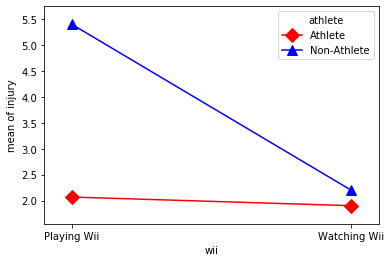

In [59]:
# athlete-wii, significant
fig = interaction_plot(data.wii, data.athlete, data.injury,
             colors=['red','blue'], markers=['D','^'], ms=10)

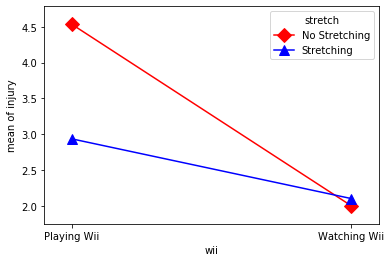

In [60]:
# stretch-wii , significant
fig = interaction_plot(data.wii, data.stretch, data.injury,
             colors=['red','blue'], markers=['D','^'], ms=10)

In [68]:
data_play = data[data['wii']=='Playing Wii']
data_watch = data[data['wii']=='Watching Wii']

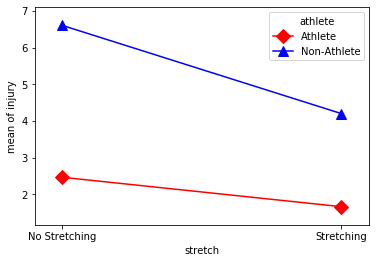

In [71]:
data_play.reset_index(inplace=True, drop=True)
# seeing the below 2 graph for stretch*wii*athlete interaction and its clear that the this interaction is present from the graph
fig = interaction_plot(data_play.stretch, data_play.athlete, data_play.injury,
             colors=['red','blue'], markers=['D','^'], ms=10)

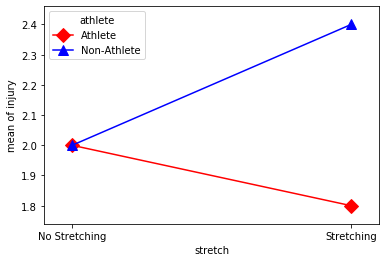

In [72]:
data_watch.reset_index(inplace=True, drop=True)
fig = interaction_plot(data_watch.stretch, data_watch.athlete, data_watch.injury,
             colors=['red','blue'], markers=['D','^'], ms=10)

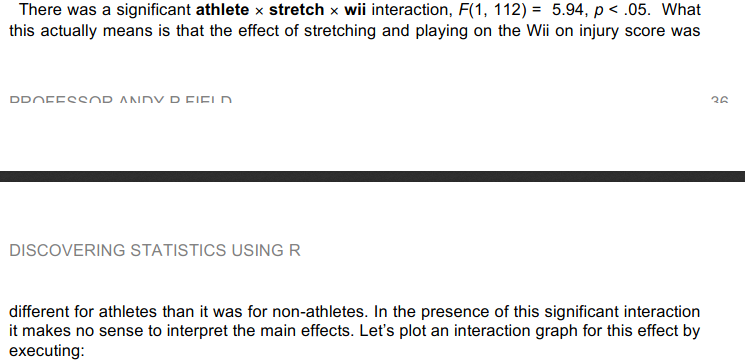

In [90]:
from IPython.display import Image
Image('triple_interaction.png')

In [73]:
m02 = smf.ols('injury~C(athlete)*C(stretch)*C(wii)',data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 injury   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     28.30
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           4.38e-22
Time:                        14:07:10   Log-Likelihood:                -191.55
No. Observations:                 120   AIC:                             399.1
Df Residuals:                     112   BIC:                             421.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     2.4667      0.319      7.730      0.000       1.834       3.099
C(athlete)[T.Non-Athlete]                                                     4.1333      0.451      9.159      0.000       3.239       5.027
C(stretch)[T.Stretching]                                                     -0.8000      0.451     -1.773      0.079      -1.694       0.094
C(wii)[T.Watching Wii]                                                       -0.4667      0.451     -1.034      0.303      -1.361       0.427
C(athlete)[T.Non-Athlete]:C(stretch)[T.Stretching]                           -1.6000      0.638     -2.507      0.014      -2.865      -0.335
C(athlete)[T.Non-Athlete]:C(wii)[T.Watching Wii]                             -4.1333      0.638     -6.477      0.000      -5.398      -2.869
C(stretch)[T.Stretching]:C(wii)[T.Watching Wii]                               0.6000      0.638      0.940      0.349      -0.665       1.865
C(athlete)[T.Non-Athlete]:C(stretch)[T.Stretching]:C(wii)[T.Watching Wii]     2.2000      0.903      2.438      0.016       0.412       3.988
==============================================================================
Omnibus:                        0.261   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.435
Skew:                          -0.002   Prob(JB):                        0.804
Kurtosis:                       2.705   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
prediction = pd.DataFrame(m02.fittedvalues)
prediction.columns = ['predicted'] 
prediction.tail()

,predicted
115,2.0
116,2.0
117,2.0
118,2.0
119,2.0


In [76]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [77]:
import statsmodels.stats.outliers_influence as sms

In [78]:
summary_frame = sms.OLSInfluence(m01).summary_frame()

In [79]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

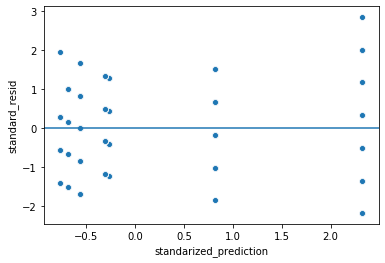

In [80]:
_ = sns.scatterplot(y = 'standard_resid', x='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

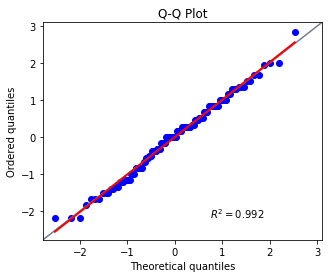

In [81]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

# **Robust Anova**

In [87]:
data_1 = data[data['interaction']==1]
data_2 = data[data['interaction']==2]
data_3 = data[data['interaction']==3]
data_4 = data[data['interaction']==4]
data_5 = data[data['interaction']==5]
data_6 = data[data['interaction']==6]
data_7 = data[data['interaction']==7]
data_8 = data[data['interaction']==8]

In [88]:
st.kruskal(data_1['injury'], data_2['injury'], data_3['injury'],data_4['injury'],data_5['injury'],data_6['injury'],data_7['injury'],data_8['injury'])

KruskalResult(statistic=61.545023015930425, pvalue=7.413698398894002e-11)

In [89]:
sm.stats.anova_lm(m01,typ=3,robust="hc3")

,sum_sq,df,F,PR(>F)
Intercept,936.514444,1.0,613.150533,3.050217e-47
"C(athlete, contrast_ath)",92.407778,1.0,60.500805,3.917340e-12
"C(stretch, contrast_str)",15.750000,1.0,10.311769,1.725570e-03
"C(wii, contrast_wii)",79.341111,1.0,51.945856,7.096708e-11
"C(athlete, contrast_ath):C(stretch, contrast_str)",1.750000,1.0,1.145752,2.867415e-01
"C(athlete, contrast_ath):C(wii, contrast_wii)",64.407778,1.0,42.168771,2.380554e-09
"C(stretch, contrast_str):C(wii, contrast_wii)",20.230000,1.0,13.244895,4.150403e-04
"C(athlete, contrast_ath):C(stretch, contrast_str):C(wii, contrast_wii)",8.470000,1.0,5.545440,2.026973e-02
Residual,171.066667,112.0,NaN,NaN
